<a href="https://www.kaggle.com/code/mohammadabdelhalim/telecom-churn-eda?scriptVersionId=126421005" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Importing libraries**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Reading the data**

In [2]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## **Data Cleaning**

In [6]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [8]:
df[["tenure","TotalCharges","MonthlyCharges"]].describe()

,tenure,TotalCharges,MonthlyCharges
count,7043.000000,7032.000000,7043.000000
mean,32.371149,2283.300441,64.761692
std,24.559481,2266.771362,30.090047
min,0.000000,18.800000,18.250000
25%,9.000000,401.450000,35.500000
50%,29.000000,1397.475000,70.350000
75%,55.000000,3794.737500,89.850000
max,72.000000,8684.800000,118.750000


In [9]:
# Check for null values
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# drop 11 null values from TotalCharges column
df.dropna(inplace = True)

In [11]:
# drop customerID column 
df.drop(columns= "customerID", inplace = True)

# **EDA**

### **How many customers have churned and what is the churn rate?**

In [12]:
churn = df['Churn'].value_counts()
churn

No     5163
Yes    1869
Name: Churn, dtype: int64

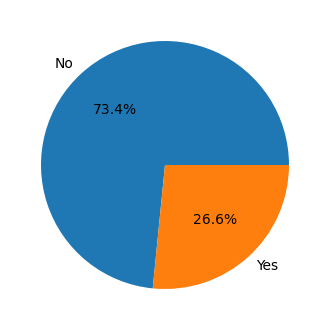

In [13]:
# Create a pie chart for churn column
plt.figure(figsize=(4, 6))
my_palette = ['#1f77b4', '#ff7f0e']
plt.pie(churn,colors = my_palette,labels = churn.index, autopct= '%1.1f%%');

### **How many Males and Females ?**

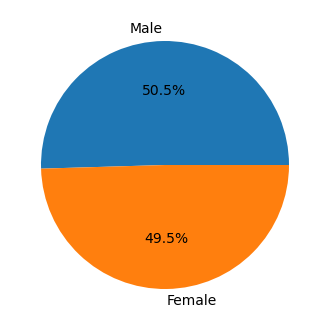

In [14]:
gender  = df['gender'].value_counts()
# Create a pie chart for churn column
my_palette = ['#1f77b4', '#ff7f0e']
plt.figure(figsize=(4, 6))
plt.pie(gender, colors  = my_palette, labels = gender.index, autopct= '%1.1f%%');

#### **They are approximately equal.**

### **What are the demographics of the customers who have churned?**

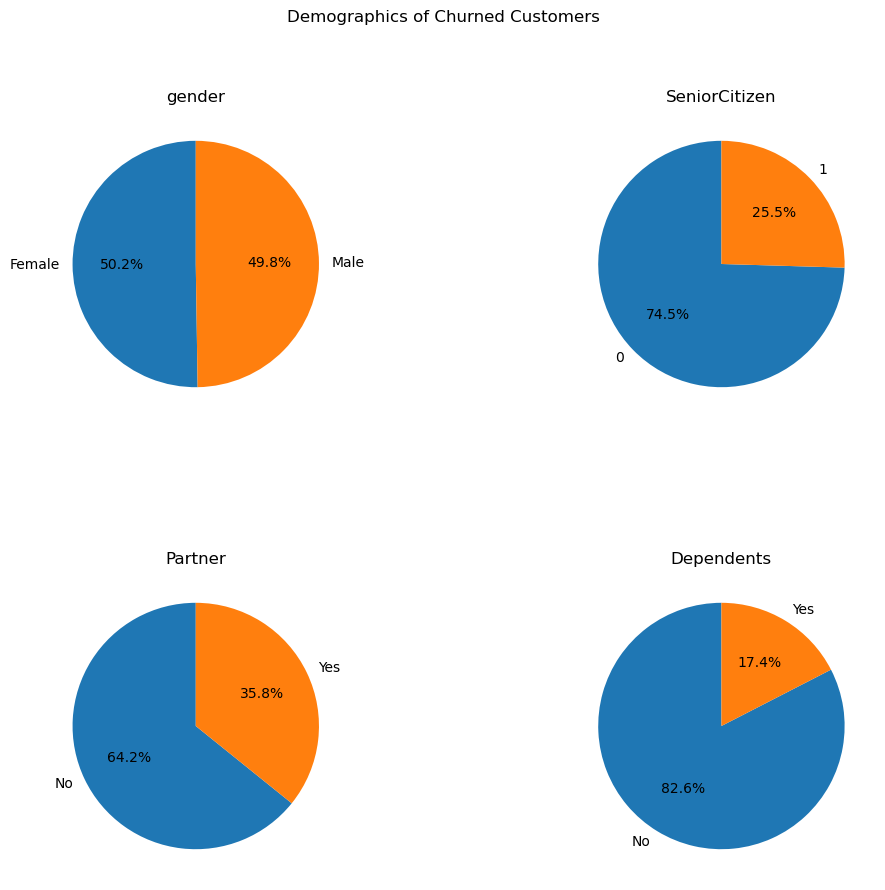

In [15]:
# Define the demographic variables to plot
demographic_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Loop through the demographic variables and create a pie chart for each
for i, var in enumerate(demographic_vars):
    row = i // 2
    col = i % 2
    
    # Group the churned customers by the demographic variable
    demographic_counts = df[df['Churn'] == 'Yes'][var].value_counts()
    
    # Create a pie chart for the variable
    axs[row][col].pie(demographic_counts, labels=demographic_counts.index, autopct='%1.1f%%', startangle=90, colors =['#1f77b4', '#ff7f0e'])
    axs[row][col].set_title(var)

# Set the title for the entire figure
fig.suptitle('Demographics of Churned Customers')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Show the plot
plt.show()


* **The gender does not affect churn.**
* **74.5% of Churned customers are not Snior Citizens.**
* **64.2% of Churned customers are do not have a partener.**
* **82.6% of Churned customers are do not have any dependents**

### **Are there any differences in churn rate between customers with partners and those without?**

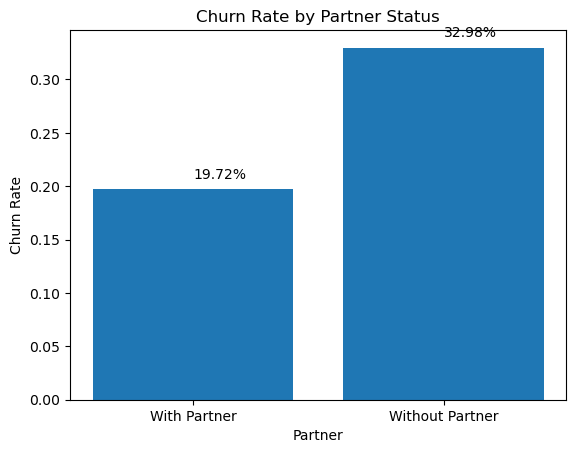

In [16]:
# Calculate the churn rate for customers with partners
with_partner = df[df['Partner'] == 'Yes']
with_partner_churn_rate = with_partner['Churn'].value_counts(normalize=True)['Yes']

# Calculate the churn rate for customers without partners
without_partner = df[df['Partner'] == 'No']
without_partner_churn_rate = without_partner['Churn'].value_counts(normalize=True)['Yes']

# Create a bar plot
plt.bar(['With Partner', 'Without Partner'], [with_partner_churn_rate, without_partner_churn_rate])
plt.xlabel('Partner')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Partner Status')

# Add percentage labels to the bars
for i, rate in enumerate([with_partner_churn_rate, without_partner_churn_rate]):
    plt.text(i, rate+0.01, str(round(rate*100,2))+'%')

plt.show()


* #### **The churn rate for customers without partner is 32.98% (greater than overall churn rate)**
* #### **The churn rate for customers with partner is 19.72% (smaller than overall churn rate)**

### **What about Dependents ?**

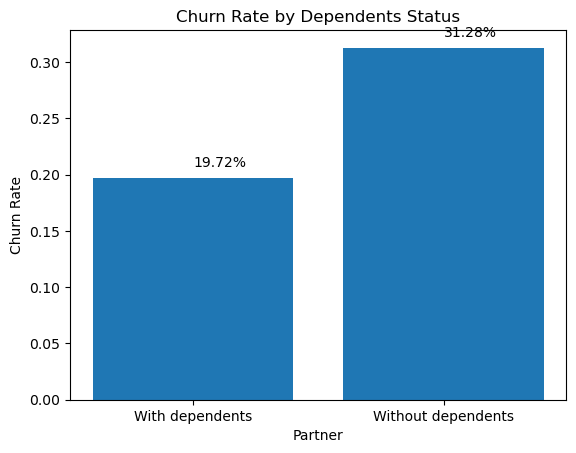

In [17]:
# Calculate the churn rate for customers with partners
with_dependents = df[df['Dependents'] == 'Yes']
with_dependents_churn_rate = with_partner['Churn'].value_counts(normalize=True)['Yes']

# Calculate the churn rate for customers without partners
without_dependents = df[df['Dependents'] == 'No']
without_dependents_churn_rate = without_dependents['Churn'].value_counts(normalize=True)['Yes']

# Create a bar plot
plt.bar(['With dependents', 'Without dependents'], [with_dependents_churn_rate, without_dependents_churn_rate])
plt.xlabel('Partner')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Dependents Status')

# Add percentage labels to the bars
for i, rate in enumerate([with_dependents_churn_rate, without_dependents_churn_rate]):
    plt.text(i, rate+0.01, str(round(rate*100,2))+'%')

plt.show()


* #### **The churn rate for customers without Dependents is 31.28% (greater than overall churn rate)**
* #### **The churn rate for customers with partner is 19.72% (smaller than overall churn rate)**

### **Are there any particular services that are strongly associated with churn?**

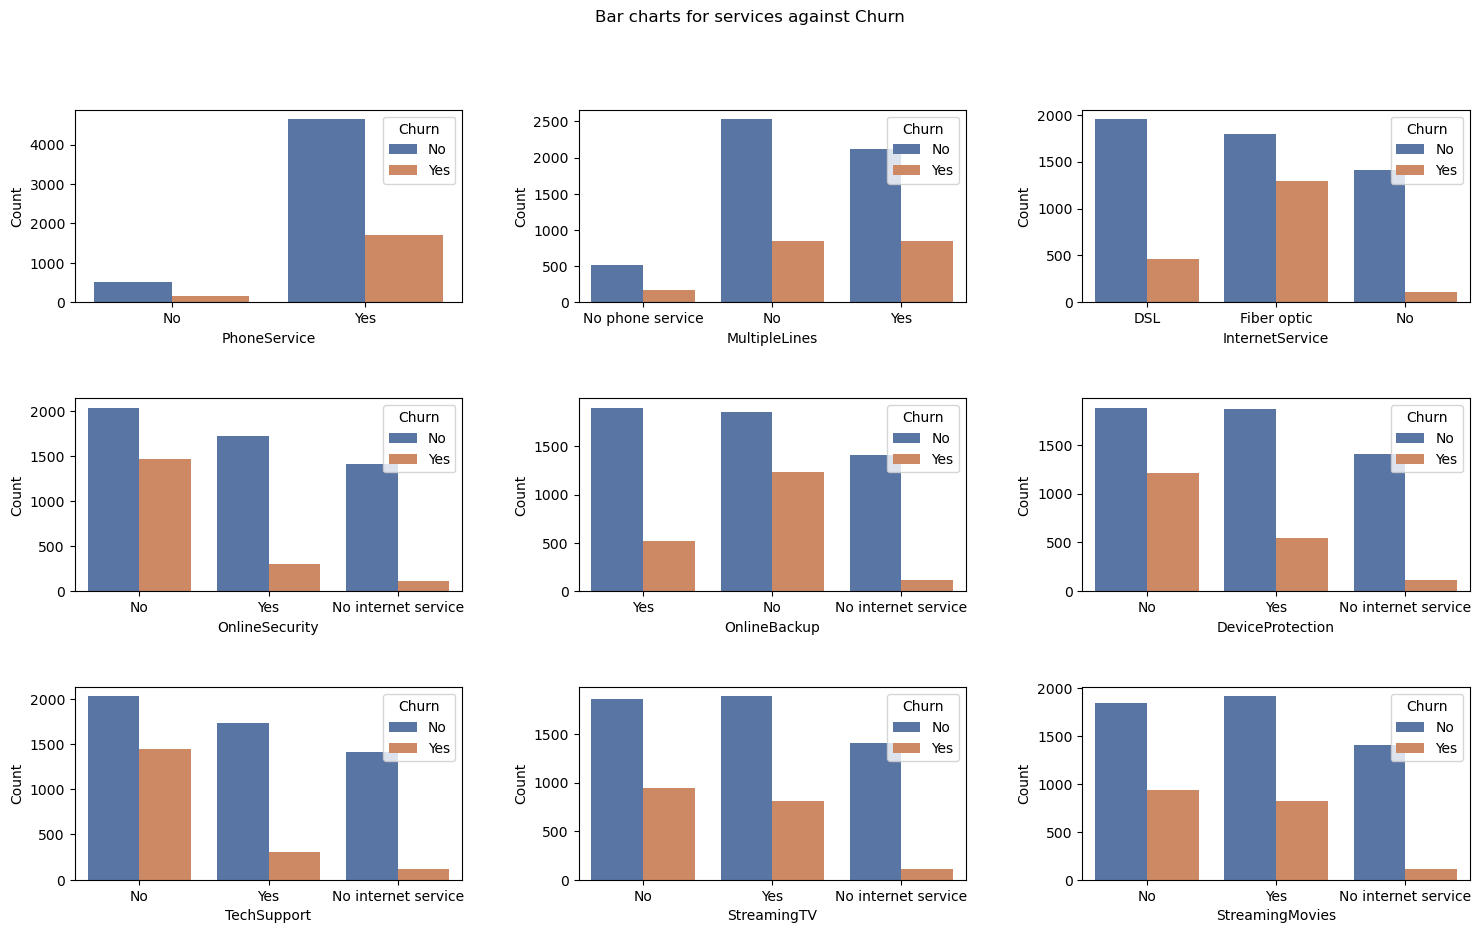

In [18]:
# Define the services to plot
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 10))

# Loop through the services and create a bar chart for each
for i, service in enumerate(services):
    row = i // 3
    col = i % 3
    # Create a countplot for the service against the Churn column
    sns.countplot(x=service, hue='Churn', data=df, ax=axs[row][col], palette="deep")
    axs[row][col].set_xlabel(service)
    axs[row][col].set_ylabel('Count')
    axs[row][col].legend(title='Churn', loc='upper right')

# Set the title for the entire figure
fig.suptitle('Bar charts for services against Churn')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Show the plot
plt.show()


* **Customers who use fiber optic are more likely to churn**
* **Customers without online security are more likely to churn**
* **Customers without online backup are more likely to churn**
* **Customers without Tech Support are more likely to churn**
* **Customers without Device Protection are more likely to churn**

In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **Are customers on long-term contracts less likely to churn?**

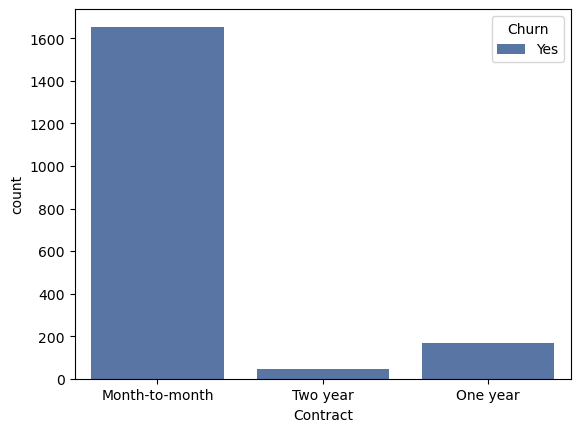

In [20]:
# Create a countplot for the service against the Churn column
sns.countplot(data=df[df['Churn'] == 'Yes'], x= "Contract" , hue='Churn', palette="deep");

#### **It is clear that customers on long-term contracts less likely to churn.**

### **Are there any patterns in the payment methods chosen by customers who have churned?**

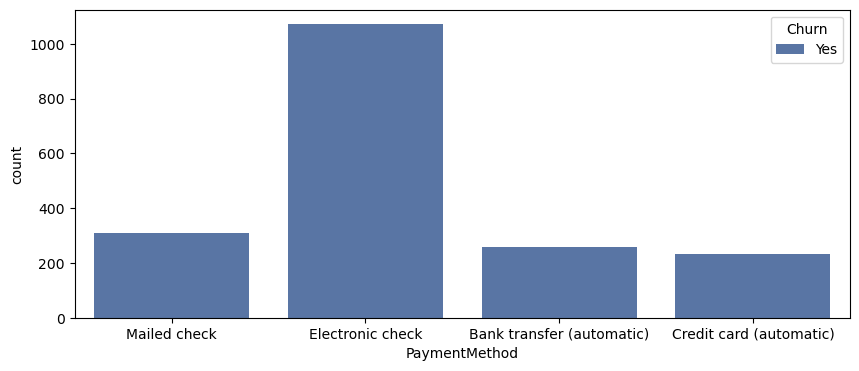

In [21]:
plt.subplots(figsize=(10,4))
sns.countplot(data = df[df['Churn'] == 'Yes'], x = "PaymentMethod", hue = "Churn", palette = "deep");

#### **The churned customers are using Electronic check**

### **Are customers who have been with the company for a longer time less likely to churn?**

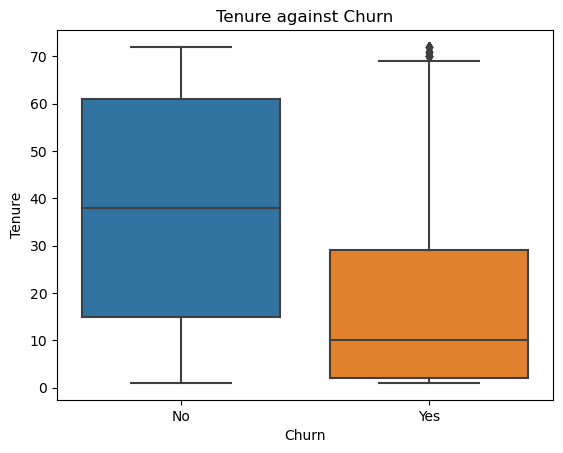

In [22]:
# Create a box plot of a numeric variable across a categorical variable
sns.boxplot(x='Churn', y='tenure', data=df)

# Add labels and title
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.title('Tenure against Churn');


#### **Yes! Older customers are less likely to churn**

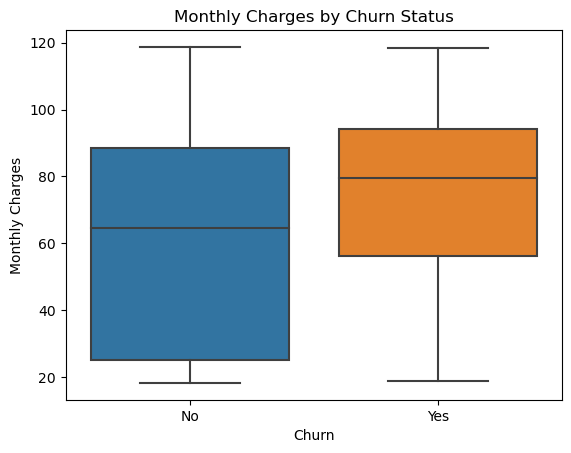

In [23]:
# Create a box plot of monthly charges by churn status
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges by Churn Status')
plt.show()


#### **Churned customers paid 60 or more per month.**

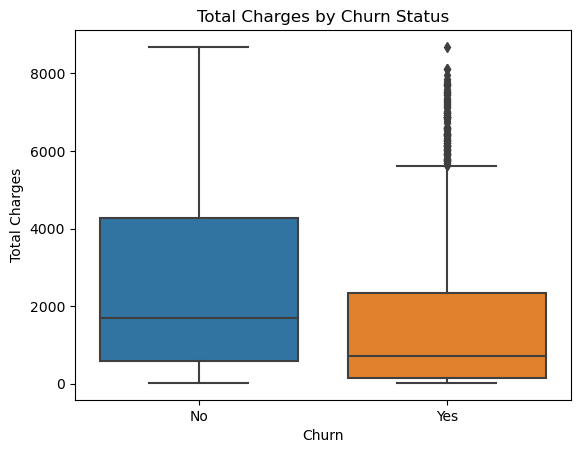

In [24]:
# Create a box plot of Total charges by churn status
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.title('Total Charges by Churn Status')
plt.show()


#### **Total charges are not high for churned customers**

<AxesSubplot:>

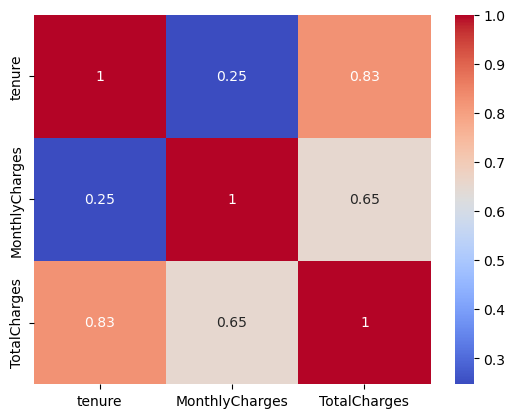

In [25]:
# Select columns for heatmap
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a heatmap using a correlation matrix
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')


#### **As Expected, total charges and tenure are strongly correlated.**

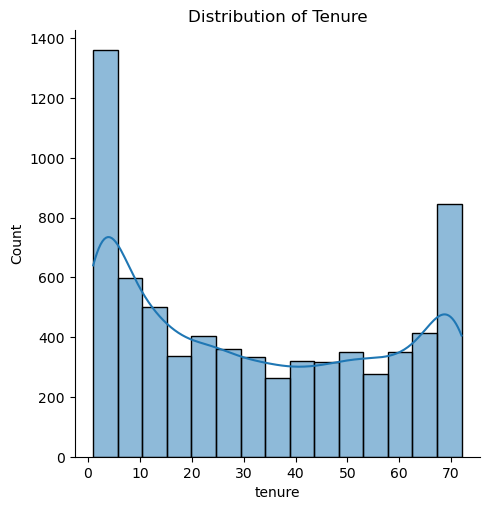

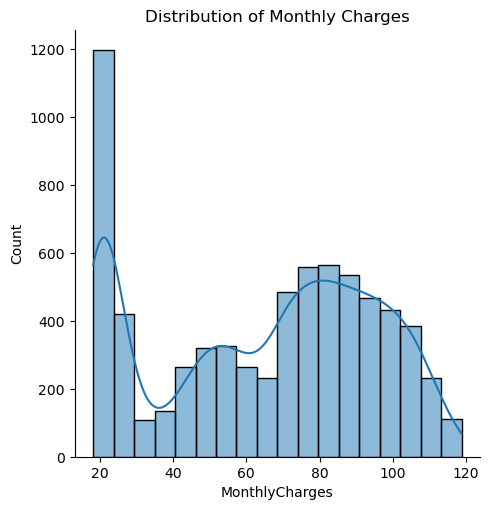

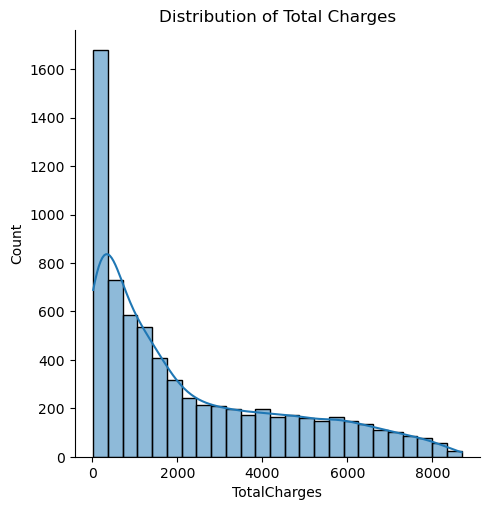

In [26]:
# Create distribution plot for 'tenure'
sns.displot(df['tenure'], kde=True)
plt.title('Distribution of Tenure')

# Create distribution plot for 'MonthlyCharges'
sns.displot(df['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges')

# Create distribution plot for 'TotalCharges'
sns.displot(df['TotalCharges'], kde=True)
plt.title('Distribution of Total Charges')

plt.show()


# **Recommendations**
* ###  **Make some offers to customers without partners and customers without Dependents.**


* ###  **Provide better online security, online backup, tech support, and device protection.**


* ###  **Encourage customers to switch to long-term contracts by discounts.**


* ###  **Consider offering alternative payment methods to electronic checks.**


* ###  **Develop marketing strategies to attract senior citizens..**


* ###  **Improve the quality of the fiber optic service.** 
